In [499]:
import pandas as pd 

df = pd.read_csv('./train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [500]:
df = df.drop('PassengerId', axis=1)
df = df.drop('Name' ,axis=1)
df = df.drop('Ticket' ,axis=1)
df = df.drop('Cabin' ,axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [501]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [502]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [503]:
from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()
df['Sex']=label.fit_transform(df['Sex'])

df['Embarked']=label.fit_transform(df['Embarked'])
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
5,0,3,1,NaN,0,0,8.4583,1
6,0,1,1,54.0,0,0,51.8625,2
7,0,3,1,2.0,3,1,21.0750,2
8,1,3,0,27.0,0,2,11.1333,2
9,1,2,0,14.0,1,0,30.0708,0


In [504]:
df['Parch']= df['Parch'] + df['SibSp']
df = df.drop('SibSp' , axis=1)
df.head(10)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,1,22.0,1,7.2500,2
1,1,1,0,38.0,1,71.2833,0
2,1,3,0,26.0,0,7.9250,2
3,1,1,0,35.0,1,53.1000,2
4,0,3,1,35.0,0,8.0500,2
5,0,3,1,NaN,0,8.4583,1
6,0,1,1,54.0,0,51.8625,2
7,0,3,1,2.0,4,21.0750,2
8,1,3,0,27.0,2,11.1333,2
9,1,2,0,14.0,1,30.0708,0


In [505]:
df.duplicated().sum()

112

In [506]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

df.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,1,22.0,1,7.2500,2
1,1,1,0,38.0,1,71.2833,0
2,1,3,0,26.0,0,7.9250,2
3,1,1,0,35.0,1,53.1000,2
4,0,3,1,35.0,0,8.0500,2


In [507]:
df.duplicated().sum()

112

In [508]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 779 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  779 non-null    int64  
 1   Pclass    779 non-null    int64  
 2   Sex       779 non-null    int32  
 3   Age       779 non-null    float64
 4   Parch     779 non-null    int64  
 5   Fare      779 non-null    float64
 6   Embarked  779 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 42.6 KB


In [509]:
df.duplicated().sum()

0

In [510]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [511]:
df.shape

(779, 7)

<Axes: >

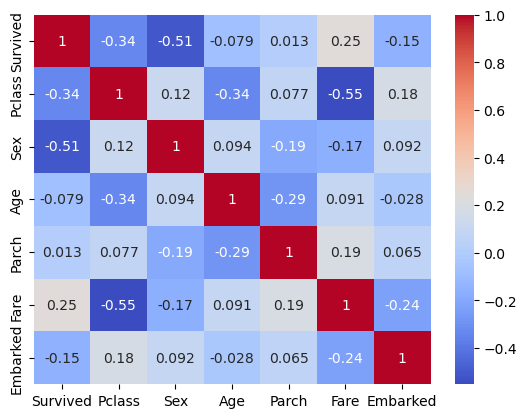

In [512]:
import seaborn as sns 

sns.heatmap(data=df.corr() , cmap='coolwarm' , annot=True)

In [513]:
import numpy as np 
X=df.values[: , 1:]
X=np.array(X)
X

array([[ 3.        ,  1.        , 22.        ,  1.        ,  7.25      ,
         2.        ],
       [ 1.        ,  0.        , 38.        ,  1.        , 71.2833    ,
         0.        ],
       [ 3.        ,  0.        , 26.        ,  0.        ,  7.925     ,
         2.        ],
       ...,
       [ 3.        ,  0.        , 29.69911765,  3.        , 23.45      ,
         2.        ],
       [ 1.        ,  1.        , 26.        ,  0.        , 30.        ,
         0.        ],
       [ 3.        ,  1.        , 32.        ,  0.        ,  7.75      ,
         1.        ]])

In [514]:
y = df['Survived']
y=np.array(y)
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,

In [515]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 0.88383187,  0.77221207, -0.56880834,  0.03801899, -0.5280197 ,
         0.57982076],
       [-1.45802197, -1.29498106,  0.59831816,  0.03801899,  0.69722768,
        -1.90193951],
       [ 0.88383187, -1.29498106, -0.27702672, -0.62013197, -0.51510389,
         0.57982076],
       ...,
       [ 0.88383187, -1.29498106, -0.00719308,  1.35432091, -0.21804025,
         0.57982076],
       [-1.45802197,  0.77221207, -0.27702672, -0.62013197, -0.09270904,
        -1.90193951],
       [ 0.88383187,  0.77221207,  0.16064572, -0.62013197, -0.51845244,
        -0.66105938]])

In [516]:
from sklearn.model_selection import train_test_split 

X_train , X_test , y_train , y_test =  train_test_split(X , y , test_size=0.2 ,random_state=42)

In [517]:
from sklearn.metrics import accuracy_score , recall_score , precision_score


def calculate_acc(y_train , y_test , y_pred_train , y_pred_test  ):
    acc_train=accuracy_score(y_true=y_train , y_pred=y_pred_train)
    acc_test=accuracy_score(y_true=y_test , y_pred=y_pred_test)
    
    r=recall_score(y_true=y_test , y_pred=y_pred_test)
    p=precision_score(y_true=y_test , y_pred=y_pred_test)
    
    print(f'acc_train : {acc_train} , acc_test : {acc_test} , recall : {r} , precision : {p} ')
    
    return acc_train , acc_test , r , p

# ANN

In [518]:
from sklearn.neural_network import MLPClassifier

ann=MLPClassifier(hidden_layer_sizes=128 , max_iter=300)
ann.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=128, max_iter=300)

In [519]:
from sklearn.metrics import confusion_matrix

y_pred_train_ann=ann.predict(X_train)
y_pred_test_ann=ann.predict(X_test)

calculate_acc(y_train , y_test , y_pred_train_ann , y_pred_test_ann)
print(f"confusion matrix:\n{confusion_matrix(y_test, y_pred_test_ann)}")

acc_train : 0.8218298555377207 , acc_test : 0.8397435897435898 , recall : 0.746031746031746 , precision : 0.8392857142857143 
confusion matrix:
[[84  9]
 [16 47]]


# LogisticRegression

In [520]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(max_iter=1000 , random_state=42)
lr.fit(X_train , y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [521]:
y_pred_train_lr=lr.predict(X_train)
y_pred_test_lr=lr.predict(X_test)

calculate_acc(y_train , y_test , y_pred_train_lr , y_pred_test_lr)
print(f"confusion matrix:\n{confusion_matrix(y_test, y_pred_test_lr)}")

acc_train : 0.7608346709470305 , acc_test : 0.8205128205128205 , recall : 0.7777777777777778 , precision : 0.7777777777777778 
confusion matrix:
[[79 14]
 [14 49]]


# Random Forrest

In [566]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf=RandomForestClassifier()
model = [
    {"n_estimators": np.arange(50 , 150 , 50),
    "max_depth": [5, 10, 15],
    "min_samples_split": [4, 6, 8]}
]

grid=GridSearchCV(estimator=rf ,param_grid=model ,cv=5)
grid.fit(X_train , y_train)
grid.best_estimator_



RandomForestClassifier(max_depth=10, min_samples_split=8)

In [572]:
rf=RandomForestClassifier(max_depth=10 , min_samples_split=8)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=8)

In [573]:
y_pred_train_rf=rf.predict(X_train)
y_pred_test_rf=rf.predict(X_test)

calculate_acc(y_train , y_test , y_pred_train_rf , y_pred_test_rf)
print(f"confusion matrix:\n{confusion_matrix(y_test, y_pred_test_rf)}")

acc_train : 0.8924558587479936 , acc_test : 0.8205128205128205 , recall : 0.6825396825396826 , precision : 0.8431372549019608 
confusion matrix:
[[85  8]
 [20 43]]


# SVM

In [525]:
from sklearn.svm import SVC

svm=SVC()
gridS={
    'C': np.arange(0.1 , 1 , 0.1),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid=GridSearchCV(cv=2 , estimator=svm , param_grid=gridS , scoring='accuracy')
grid.fit(X_train,y_train)
svm = grid.best_estimator_
svm.fit(X_train,y_train)



SVC(C=0.9)

In [526]:
y_pred_train_svm=svm.predict(X_train)
y_pred_test_svm=svm.predict(X_test)

calculate_acc(y_train , y_test , y_pred_train_svm , y_pred_test_svm)
print(f"confusion matrix:\n{confusion_matrix(y_test, y_pred_test_rf)}")

acc_train : 0.8041733547351525 , acc_test : 0.8589743589743589 , recall : 0.7777777777777778 , precision : 0.8596491228070176 
confusion matrix:
[[83 10]
 [18 45]]


# XGBoost

In [589]:
from xgboost import XGBClassifier

xgboost=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
}

grid=GridSearchCV(cv=2 , estimator=xgboost , param_grid=param_grid ,scoring='accuracy')
grid.fit(X_train,y_train)
xgboost=grid.best_estimator_
xgboost.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [590]:
y_pred_train_xgboost=xgboost.predict(X_train)
y_pred_test_xgboost=xgboost.predict(X_test)

calculate_acc(y_train , y_test , y_pred_train_xgboost , y_pred_test_xgboost)
print(f"confusion matrix:\n{confusion_matrix(y_test, y_pred_test_xgboost)}")

acc_train : 0.8715890850722311 , acc_test : 0.8397435897435898 , recall : 0.7301587301587301 , precision : 0.8518518518518519 
confusion matrix:
[[85  8]
 [17 46]]


In [552]:
xgboost.predict(X_test)

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1])

In [553]:
xgboost.predict(X_train)

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

# Gradient boost

In [577]:
from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier()
grid_param = {
    'n_estimators': [180, 200, 230],
    'subsample': [0.8, 1],
    'max_depth': [5, 7, 10]
}
grid=GridSearchCV(cv=5 , estimator=gb , param_grid=grid_param)
grid.fit(X_train,y_train)
grid.best_estimator_

GradientBoostingClassifier(max_depth=5, n_estimators=180, subsample=1)

In [591]:
# gb=GradientBoostingClassifier(max_depth=5, n_estimators=180, subsample=1)
gb=GradientBoostingClassifier(n_estimators=150, subsample=1)
gb.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=150, subsample=1)

In [592]:
y_pred_train_gb=gb.predict(X_train)
y_pred_test_gb=gb.predict(X_test)

calculate_acc(y_train , y_test , y_pred_train_gb , y_pred_test_gb)
print(f"confusion matrix:\n{confusion_matrix(y_test, y_pred_test_gb)}")

acc_train : 0.9229534510433387 , acc_test : 0.8461538461538461 , recall : 0.746031746031746 , precision : 0.8545454545454545 
confusion matrix:
[[85  8]
 [16 47]]


read test file and submitted

In [535]:
df_test=pd.read_csv('./test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [536]:
df_test = df_test.drop('PassengerId', axis=1)
df_test = df_test.drop('Name' ,axis=1)
df_test = df_test.drop('Ticket' ,axis=1)
df_test = df_test.drop('Cabin' ,axis=1)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [537]:
df_test['Sex']=label.fit_transform(df_test['Sex'])

df_test['Embarked']=label.fit_transform(df_test['Embarked'])
df_test['Parch']= df_test['Parch'] + df_test['SibSp']
df_test = df_test.drop('SibSp' , axis=1)
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())
df_test.head()

,Pclass,Sex,Age,Parch,Fare,Embarked
0,3,1,34.5,0,7.8292,1
1,3,0,47.0,1,7.0000,2
2,2,1,62.0,0,9.6875,1
3,3,1,27.0,0,8.6625,2
4,3,0,22.0,2,12.2875,2


In [538]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [539]:
df_test.shape

(418, 6)

In [540]:
x_test=df_test.values
x_test=scaler.fit_transform(x_test)
x_test

array([[ 0.87348191,  0.75592895,  0.3349926 , -0.5534426 , -0.49840706,
        -0.47091535],
       [ 0.87348191, -1.32287566,  1.32553003,  0.10564289, -0.51327429,
         0.70076689],
       [-0.31581919,  0.75592895,  2.51417495, -0.5534426 , -0.46508846,
        -0.47091535],
       ...,
       [ 0.87348191,  0.75592895,  0.65196458, -0.5534426 , -0.50879189,
         0.70076689],
       [ 0.87348191,  0.75592895,  0.        , -0.5534426 , -0.4944482 ,
         0.70076689],
       [ 0.87348191,  0.75592895,  0.        ,  0.76472838, -0.23790598,
        -1.64259759]])

In [593]:
finally_pred=gb.predict(x_test)
finally_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [542]:
submission=pd.read_csv('./gender_submission.csv')
submission.shape

(418, 2)

In [543]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [544]:
submission = submission.drop('Survived' , axis=1)
submission.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [595]:
submission['Survived']=finally_pred
submission.to_csv('./final_submission_gb.csv' , index=False)